# Nanodegree Fundamentos de Machine Learning
## Modelo de Avaliação e Validação
## Projeto 1: Estimando Preços dos Imóveis de Boston

Bem-vindo ao primeiro projeto do Nanodegree de Engenheiro de Machine Learning! Neste Notebook, alguns templates de código estão sendo fornecidos para você, e você irá precisar implementar funcionalidades adicionais para completar este projeto com sucesso. Você não vai precisar modificar o código que foi incluído além do que está sendo pedido. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código seguinte vai exigir que você providencie funcionalidade adicional. Instruções serão fornecidas para cada seção e as especificidades da implementação são marcadas no bloco de código com o comando 'TODO'. Não esqueça de ler as instruções atentamente!

Além do código implementado, haverá questões relacionadas com o projeto e sua implementação que você deve responder. Cada seção em que há uma questão para você responder, ela será precedida por **'Questão X'** no cabeçalho. Leia cada questão cuidadosamente e dê respostas completas no seguinte box de texto que contém **'Resposta: '**. O projeto enviado será avaliado com base nas respostas para cada uma das questões e a implementação que você nos forneceu.  

>**Nota:** Células de Código e de Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas ao clicar normalmente duas vezes na célula para entrar no modo de edição.

## Antes de começar
Certifique-se que a sua versão do scikit-learn é a mesma que deve ser utilizada neste notebook. Execute a célula abaixo para verificar se sua versão é a ideal. Se você não quiser fazer *downgrade*, você precisa ficar atento as diferenças citadas ao decorrer do código.

In [2]:
import sklearn
print("A versão do scikit-learn é ", sklearn.__version__)
if sklearn.__version__ >= '0.18':
    print("Tudo certo!")
else:
    print("Você precisa fazer upgrade do scikit-learn ou ficar atento com as diferenças das versões")
    print("Pode ser feito executando:\n")
    print("pip install scikit-learn==0.18.1")

A versão do scikit-learn é  0.18.2
Tudo certo!


## Começando
Neste projeto, você irá avaliar o desempenho e o poder de estimativa de um modelo que foi treinado e testado em dados coletados dos imóveis dos subúrbios de Boston, Massachusetts. Um modelo preparado para esses dados e visto como *bem ajustado* pode ser então utilizado para certas estimativas sobre um imóvel – em particular, seu valor monetário. Esse modelo seria de grande valor para alguém como um agente mobiliário, que poderia fazer uso dessas informações diariamente.

O conjunto de dados para este projeto se origina do [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Housing). Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston. Para o propósito deste projeto, os passos de pré-processamento a seguir foram feitos para esse conjunto de dados:
- 16 observações de dados possuem um valor `'MEDV'` de 50.0. Essas observações provavelmente contêm **valores ausentes ou censurados** e foram removidas.
- 1 observação de dados tem um valor `'RM'` de 8.78. Essa observação pode ser considerada **valor atípico (outlier)** e foi removida.
- Os atributos `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` são essenciais. O resto dos **atributos irrelevantes** foram excluídos.
- O atributo `'MEDV'` foi **escalonado multiplicativamente** para considerar 35 anos de inflação de mercado.

** Execute a célula de código abaixo para carregar o conjunto dos dados dos imóveis de Boston, além de algumas bibliotecas de Python necessárias para este projeto. Você vai saber que o conjunto de dados carregou com sucesso se o seu tamanho for reportado. **

In [3]:
# Importar as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis de Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Êxito
print("O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape))

O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.


/anaconda3/envs/boston_houses/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/envs/boston_houses/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Explorando os Dados
Na primeira seção deste projeto, você fará uma rápida investigação sobre os dados de imóveis de Boston e fornecerá suas observações. Familiarizar-se com os dados durante o processo de exploração é uma prática fundamental que ajuda você a entender melhor e justificar seus resultados.

Dado que o objetivo principal deste projeto é construir um modelo de trabalho que tem a capacidade de estimar valores dos imóveis, vamos precisar separar os conjuntos de dados em **atributos** e **variável alvo**. O **atributos**, `'RM'`, `'LSTAT'` e `'PTRATIO'`, nos dão informações quantitativas sobre cada ponto de dado. A **variável alvo**, `'MEDV'`, será a variável que procuramos estimar. Eles são armazenados em `features` e ` prices`, respectivamente.

### Implementação: Calcular Estatísticas
Para a sua primeira implementação de código, você vai calcular estatísticas descritivas sobre preços dos imóveis de Boston. Dado que o `numpy` já foi importado para você, use essa biblioteca para executar os cálculos necessários. Essas estatísticas serão extremamente importantes depois para analisar várias estimativas resultantes do modelo construído.

Na célula de código abaixo, você precisará implementar o seguinte:
- Calcular o mínimo, o máximo, a média, a mediana e o desvio padrão do `'MEDV'`, que está armazenado em `prices`.
  - Armazenar cada cálculo em sua respectiva variável.

In [4]:
# TODO: Preço mínimo dos dados
minimum_price = prices.min()

# TODO: Preço máximo dos dados
maximum_price = prices.max()

# TODO: Preço médio dos dados
mean_price = prices.mean()

# TODO: Preço mediano dos dados
median_price = prices.median()

# TODO: Desvio padrão do preço dos dados
std_price = prices.std()

# Mostrar as estatísticas calculadas
print("Estatísticas para os dados dos imóveis de Boston:\n")
print("Preço mínimo: ${:,.2f}".format(minimum_price))
print("Preço máximo: ${:,.2f}".format(maximum_price))
print("Preço médio: ${:,.2f}".format(mean_price))
print("Preço mediano: ${:,.2f}".format(median_price))
print("Desvio padrão dos preços: ${:,.2f}".format(std_price))

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,340.28


### Questão 1 - Observação de Atributos
Para lembrar, estamos utilizando três atributos do conjunto de dados dos imóveis de Boston: `'RM'`, `'LSTAT'` e `'PTRATIO'`. Para cada observação de dados (vizinhança):
- `'RM'` é o número médio de cômodos entre os imóveis na vizinhança.
- `'LSTAT'` é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
- `'PTRATIO'` é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.

**Usando a sua intuição, para cada um dos atributos acima, você acha que um aumento no seu valor poderia levar a um _aumento_ no valor do `'MEDV'` ou uma _diminuição_ do valor do `'MEDV'`? Justifique sua opinião para cada uma das opções.**  

**Dica:** Você pode tentar responder pensando em perguntas como:
* Você espera que um imóvel que tem um valor `'RM'` de 6 custe mais ou menos que um imóvel com valor `'RM'` de 7?
* Você espera que um imóvel em um bairro que tem um valor `'LSTAT'` de 15 custe mais ou menos que em um bairro com valor `'LSTAD'` de 20?
* Você espera que um imóvel em um bairro que tem um valor `'PTRATIO'` de 10 custe mais ou menos que em um bairro com `'PTRATIO'` de 15?

**Resposta:**

- RM: o aumento do número de cômodos de um imóvel irá, muito provavelmente, aumentar o seu valor, uma vez que a área do imóvel irá aumentar e ele também mudará de patamar. Logo, MEDV aumenta junto com o RM.

- LSTAT: Um maior percentual de pessoas de "classe baixa" morando em uma região, significa que os imóveis devem ter um custo de aquisição/aluguel mais baixo. Sendo assim, MEDV diminui quando LSTAT aumenta.

- PTRATIO: Este parece ser um dado menos conclusivo que os dois anteriores. Talvez, um número maior de jovens estudantes pudesse indicar uma maior quantidade de famílias morando na região. A concorrência por imóveis seria maior, quando existem mais famílias, o que aquece o mercado e eleva o preço (não existem imóveis vagos na região). Logo, um aumento populacional de estudantes (PTRATIO) PODERIA poderia afetar MEDV positivamente. 

----

## Desenvolvendo um Modelo
Na segunda seção deste projeto, você vai desenvolver ferramentas e técnicas necessárias para um modelo que faz estimativas. Ser capaz de fazer avaliações precisas do desempenho de cada modelo através do uso dessas ferramentas e técnicas ajuda a reforçar a confiança que você tem em suas estimativas.

### Implementação: Definir uma Métrica de Desempenho
É difícil medir a qualidade de um modelo dado sem quantificar seu desempenho durante o treinamento e teste. Isso é geralmente feito utilizando algum tipo de métrica de desempenho, através do cálculo de algum tipo de erro, qualidade de ajuste, ou qualquer outra medida útil. Para este projeto, você irá calcular o [*coeficiente de determinação*](https://pt.wikipedia.org/wiki/R%C2%B2), R<sup>2</sup>, para quantificar o desempenho do seu modelo. O coeficiente de determinação é uma estatística útil no campo de análise de regressão uma vez que descreve o quão "bom" é a capacidade do modelo em fazer estimativas. 

Os valores para R<sup>2</sup> têm um alcance de 0 a 1, que captura a porcentagem da correlação ao quadrado entre a estimativa e o valor atual da **variável alvo**. Um modelo R<sup>2</sup> de valor 0 sempre falha ao estimar a variável alvo, enquanto que um modelo R<sup>2</sup> de valor 1, estima perfeitamente a variável alvo. Qualquer valor entre 0 e 1 indica qual a porcentagem da variável alvo (ao utilizar o modelo) que pode ser explicada pelos **atributos**. *Um modelo pode dar também um R<sup>2</sup> negativo, que indica que o modelo não é melhor do que aquele que estima ingenuamente a média da variável alvo.*

Para a função ‘performance_metric’ na célula de código abaixo, você irá precisar implementar o seguinte:
- Utilizar o `r2_score` do `sklearn.metrics` para executar um cálculo de desempenho entre `y_true` e `y_predict`.
- Atribuir a pontuação do desempenho para a variável `score`.

In [5]:
# TODO: Importar 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

### Questão 2 - Qualidade do Ajuste
Admita que um conjunto de dados que contém cinco observações de dados e um modelo fez a seguinte estimativa para a variável alvo:

| Valores Reais | Estimativa |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

** Executar a célula de código abaixo para usar a função `performance_metric’ e calcular o coeficiente de determinação desse modelo. **

In [6]:
# Calcular o desempenho deste modelo
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("O coeficiente de determinação, R^2, do modelo é {:.3f}.".format(score))

O coeficiente de determinação, R^2, do modelo é 0.923.


* Você consideraria que esse modelo foi capaz de capturar a variação da variável alvo com sucesso? Por que ou por que não?

** Dica: **
* R2 score com valor 0 significa que a variável dependente não pode ser estimada pela variável independente.
* R2 score com valor 1 significa que a variável dependente pode ser estimada pela variável independente.
* R2 score com valor entre 0 e 1 significa quanto a variável dependente pode ser estimada pela variável independente.
* R2 score com valor 0.40 significa que 40 porcento da variância em Y é estimável por X.

**Resposta:**
Sim, considero. Uma vez que o Coeficiente de Determinação do modelo (0.923) é muito próximo de 1, sendo mais de 90% estimável a variância da variável alvo.

### Implementação: Misturar e Separar os Dados
Sua próxima implementação exige que você pegue o conjunto de dados de imóveis de Boston e divida os dados em subconjuntos de treinamento e de teste. Geralmente os dados são também misturados em uma ordem aleatória ao criar os subconjuntos de treinamento e de teste para remover qualquer viés (ou erro sistemático) na ordenação do conjunto de dados.

Para a célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize `train_test_split` do `sklearn.model_selection` para misturar e dividir os dados de `features` e `prices` em conjuntos de treinamento e teste. Leia mais [aqui](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.train_test_split.html).
  - Divida os dados em 80% treinamento e 20% teste.
  - Mude o `random_state` do `train_test_split` para um valor de sua escolha. Isso garante resultados consistentes.
- Atribuir a divisão de treinamento e teste para X_train`, `X_test`, `y_train` e `y_test`.

In [7]:
# TODO: Importar 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Misturar e separar os dados em conjuntos de treinamento e teste
X = np.array(data[['RM', 'LSTAT', 'PTRATIO']])
y = np.array(data['MEDV'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Êxito
print("Separação entre treino e teste feita com êxito.")

Separação entre treino e teste feita com êxito.


### Questão 3 - Treinamento e Teste
* Qual o benefício de separar o conjunto de dados em alguma relação de subconjuntos de treinamento e de teste para um algoritmo de aprendizagem?

**Dica:** O que pode dar errado se não houver uma maneira de testar seu modelo?

**Resposta:**
É extremamente desejável que determinemos se o modelo é bom ou não. A melhor forma de fazê-lo, é executando testes com um subconjunto dos dados. Se não houver uma maneira de testar o modelo, podemos facilmente cometer um engano quanto à sua eficácia, uma vez que podem aparecer poucos erros de treinamento deste (já que utilizamos estes dados para escolher um modelo adequado), ao passo que um teste poderia revelar uma quantidade significativa de erros, invalidando o modelo.

----

## Analisando o Modelo de Desempenho
Na terceira parte deste projeto, você verá o desempenho em aprendizagem e teste de vários modelos em diversos subconjuntos de dados de treinamento. Além disso, você irá investigar um algoritmo em particular com um parâmetro `'max_depth'` (profundidade máxima) crescente, em todo o conjunto de treinamento, para observar como a complexidade do modelo afeta o desempenho. Plotar o desempenho do seu modelo baseado em critérios diversos pode ser benéfico no processo de análise, por exemplo: para visualizar algum comportamento que pode não ter sido aparente nos resultados sozinhos.

### Curvas de Aprendizagem
A célula de código seguinte produz quatro gráficos para um modelo de árvore de decisão com diferentes níveis de profundidade máxima. Cada gráfico visualiza a curva de aprendizagem do modelo para ambos treinamento e teste, assim que o tamanho do conjunto treinamento aumenta. Note que a região sombreada da curva de aprendizagem denota a incerteza daquela curva (medida como o desvio padrão). O modelo é pontuado em ambos os conjuntos treinamento e teste utilizando R<sup>2</sup>, o coeficiente de determinação.  

**Execute a célula de código abaixo e utilizar esses gráficos para responder as questões a seguir.**

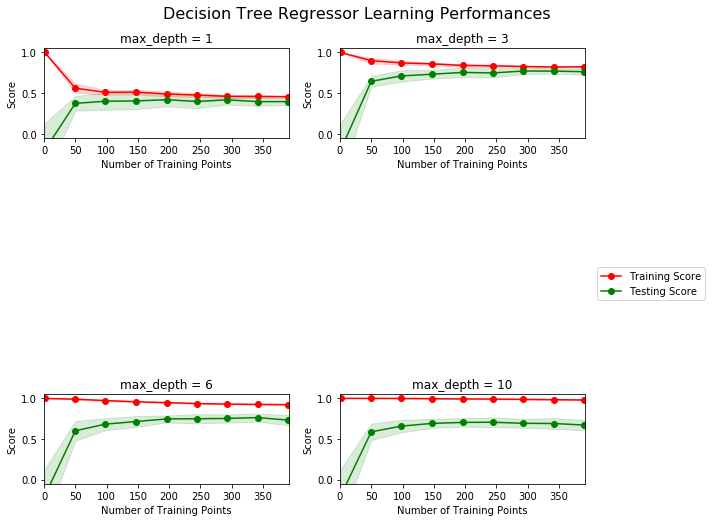

In [8]:
# Criar curvas de aprendizagem para tamanhos de conjunto de treinamento variável e profundidades máximas
vs.ModelLearning(features, prices)

### Questão 4 - Compreendendo os Dados
* Escolha qualquer um dos gráficos acima e mencione a profundidade máxima escolhida.
* O que acontece com a pontuação da curva de treinamento se mais pontos de treinamento são adicionados? E o que acontece com a curva de teste?
* Ter mais pontos de treinamento beneficia o modelo?

**Dica:** As curvas de aprendizagem convergem para uma pontuação em particular? Geralmente, quanto mais dados você tem, melhor. Mas, se sua curva de treinamento e teste estão convergindo com um desempenho abaixo do benchmark, o que seria necessário? Pense sobre os prós e contras de adicionar mais pontos de treinamento baseado na convergência das curvas de treinamento e teste.

**Resposta:**

- Escolha: max_depth = 1
- Adição de mais pontos de treinamento:
    - A curva de treinamento mostra que a pontuação treinamento diminui, até certo ponto;
    - A curva de teste mostra que a pontuação de testes aumenta, até certo ponto;
    - Com a adição de mais pontos, ambas convergem para uma pontuação e estabilizam. Podemos concluir que ter mais pontos de treinamento, além desses, não necessariamente melhoraria o resultado. Se o desempenho estiver abaixo do benchmark, podemos concluir que só uma troca de modelo poderia resolver o problema.

### Curvas de Complexidade
A célula de código a seguir produz um gráfico para um modelo de árvore de decisão que foi treinada e validada nos dados de treinamento utilizando profundidades máximas diferentes. O gráfico produz duas curvas de complexidade – uma para o treinamento e uma para a validação. Como a **curva de aprendizagem**, a área sombreada de ambas as curvas de complexidade denota uma incerteza nessas curvas, e o modelo pontuou em ambos os conjuntos de treinamento e validação utilizando a função `performance_metric`.  

** Execute a célula de código abaixo e utilize o gráfico para responder as duas questões a seguir. **

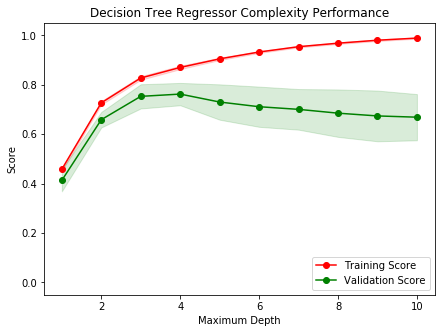

In [9]:
vs.ModelComplexity(X_train, y_train)

### Questão 5 - Equilíbrio entre viés e variância
* Quando o modelo é treinado com o profundidade máxima 1, será que o modelo sofre mais de viés (erro sistemático) ou variância (erro aleatório)?
* E o que acontece quando o modelo é treinado com profundidade máxima 10? Quais pistas visuais existem no gráfico para justificar suas conclusões?

**Dica:** Como você sabe que um modelo está experimentando viés alto ou variância alta? Viés alto é um sinal de *underfitting* (o modelo não é complexo o suficiente para aprender os dados) e alta variância é um sinal de *overfitting* (o modelo está "decorando" os dados e não consegue generalizar bem o problema). Pense em modelos (com profundidade de 1 e 10, por exemplo) e qual deles está alinhado com qual parte do equilíbrio.

**Resposta:**

- Quando treinado com profundidade máxima 1, o modelo sofre mais de viés (underfitting), uma vez que Training Score e Validation escore estão muito próximos, ao mesmo tempo que com um valor relativamente médio.
- Quando com profundidade máxima 10, sofre mais de variância (overfitting), uma vez que podemos visualizar a distância entre as duas curvas, ao mesmo tempo que ambas ainda possuem um score alto.

### Questão 6 - Modelo Ótimo de Melhor Suposição
* Qual profundidade máxima (`'max_depth'`) você acredita que resulta em um modelo que melhor generaliza um dado desconhecido?
* Que intuição te levou a essa resposta?

**Dica: ** Olhe no gráfico acima e veja o desempenho de validação para várias profundidades atribuidas ao modelo. Ele melhora conforme a profundidade fica maior? Em qual ponto nós temos nosso melhor desempenho de validação sem supercomplicar nosso modelo? E lembre-se, de acordo com a [Navalha de Occam](https://pt.wikipedia.org/wiki/Navalha_de_Occam), sempre devemos optar pelo mais simples ao complexo se ele conseguir definir bem o problema.

**Resposta:**

Eu diria que "max_depth=3" seria a melhor escolha, a princípio. A validação só está piorando quando a produndidade passa disso, sem nenhum ganho no score de validação (ao contrário, perda). Ao aumentar a profundidade, nos encaminhamos para modelos que sofrem de overfitting.

-----

## Avaliando o Desempenho do Modelo
Nesta parte final do projeto, você irá construir um modelo e fazer uma estimativa de acordo com o conjunto de atributos do cliente utilizando um modelo otimizado a partir de `fit_model`.

### Questão 7 - Busca em Matriz
* O que é a técnica de busca em matriz (*grid search*)?
* Como ela pode ser aplicada para otimizar um algoritmo de aprendizagem?

** Dica: ** Quando explicar a técnica de busca em matriz, tenha certeza que você explicou o motivo dela ser usada, o que a 'matriz' significa nesse caso e qual o objetivo da técnica. Para ter uma resposta mais sólida, você pode também dar exemplo de um parâmetro em um modelo que pode ser otimizado usando essa técnica.

**Resposta:**

- É uma técnica que aplica um produto cartesiano dos hiperparâmetros, montando uma tabela com todas as possibilidades, permitindo-nos escolher o melhor resultado.
- Por exemplo: Combinando gama (0.1, 1 e 10) e Kernel (Linear ou Polinomial), teremos 6 diferentes combinações, onde uma delas possuirá o maior F1 Score, que será escolhido.

### Questão 8 - Validação Cruzada
* O que é a técnica de treinamento de validação-cruzada k-fold?
* Quais benefícios essa técnica proporciona para busca em matriz ao otimizar um modelo?

**Dica:** Lembre-se de expllicar o que significa o 'k' da validação-cruzada k-fold, como a base de dados é dividida e quantas vezes ela é executada.

Assim como há um raciocínio por trás de utilizar um conjunto de teste, o que poderia dar errado ao utilizar busca em matriz sem um conjunto de validação cruzada? Você pode utilizar a [documentação](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) para basear sua resposta.

**Resposta:**

- É uma técnica de validação cruzada. Para evitar descartar uma boa quantidade de dados (separados para testes), esta técnica quebra os dados em "k" pedaços (k é um número) e executa o modelo também "k" vezes, onde cada vez um dos pedaços é o conjunto de testes e os outros são usados para treinamento.

- Por exemplo: se k=4, serão executados treinamento do modelo 4 vezes, cada uma sobre os 4 pedaços divididos dos dados, onde cada pedaço será utilizado como dados de teste 1 vez.

- Sobre o risco da busca em matriz sem validação cruzada: os hiperparâmetros poderiam ser espremidos (exaustivamente ajustados) até que o resultado pareça otimizado, mas que acaba sendo viciado. A validação cruzada irá ajudar a evitar este risco. 

### Implementação: Ajustar um Modelo
Na sua última implementação, você vai precisar unir tudo o que foi aprendido e treinar um modelo utilizando o **algoritmo de árvore de decisão**. Para garantir que você está produzindo um modelo otimizado, você treinará o modelo utilizando busca em matriz para otimizar o parâmetro de profundidade máxima (`'max_depth'`) para uma árvore de decisão. Esse parâmetro pode ser entendido como o número de perguntas que o algoritmo de árvore de decisão pode fazer sobre os dados antes de fazer uma estimativa. Árvores de decisão são parte de uma classe de algoritmos chamados *algoritmos de aprendizagem supervisionada*.

Além disso, você verá que a implementação está usando o `ShuffleSplit()` como alternativa para a validação cruzada (veja a variável `cv_sets`). Ela não é a técnica que você descreveu na **Questão 8**, mas ela é tão útil quanto. O `ShuffleSplit()` abaixo irá criar 10 (`n_splits`) conjuntos misturados e 20% (`test_size`) dos dados serão utilizados para validação. Enquanto estiver trabalhando na sua implementação, pense nas diferenças e semelhanças com a validação k-fold.

* [ShuffleSplit](http://scikit-learn.org/0.18/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit) - `ShuffleSplit(n_splits=10, test_size=’default’, train_size=None, random_state=None)`

Para a função `fit_model` na célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize o [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) do `sklearn.tree` para gerar um objeto regressor de árvore de decisão.
  - Atribua esse objeto à variável `'regressor'`.
- Gere um dicionário para `'max_depth'` com os valores de 1 a 10 e atribua isso para a variável `'params'`.
- Utilize o [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) do `sklearn.metrics` para gerar um objeto de função de pontuação.
  - Passe a função `performance_metric` como um parâmetro para esse objeto.
  - Atribua a função de pontuação à variável `'scoring_fnc'`.
- Utilize o [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) do `sklearn.grid_search` para gerar um objeto de busca por matriz.
  - Passe as variáveis `'regressor'`, `'params'`, `'scoring_fnc'` and `'cv_sets'` como parâmetros para o objeto. 
  - Atribua o objeto `GridSearchCV` para a variável `'grid'`.

In [ ]:
# TODO: Importar 'make_scorer', 'DecisionTreeRegressor' e 'GridSearchCV'

def fit_model(X, y):
    """ Desempenhar busca em matriz sobre o parâmetro the 'max_depth' para uma 
        árvore de decisão de regressão treinada nos dados de entrada [X, y]. """
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados
    cv_sets = ShuffleSplit(n_splits=10, test_size = 0.20, random_state=0)

    # TODO: Gerar uma árvore de decisão de regressão de objeto
    regressor = None

    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    params = {}

    # TODO: Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = None

    # TODO: Gerar o objeto de busca em matriz
    grid = None

    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)

    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

### Fazendo Estimativas
Uma vez que o modelo foi treinado em conjunto de dados atribuído, ele agora pode ser utilizado para fazer estimativas em novos conjuntos de entrada de dados. No caso do *regressor da árvore de decisão*, o modelo aprendeu *quais são as melhores perguntas sobre a entrada de dados*, e pode responder com uma estimativa para a **variável alvo**. Você pode utilizar essas estimativas para conseguir informações sobre os dados dos quais o valor da variável alvo é desconhecida – por exemplo, os dados dos quais o modelo não foi treinado.

### Questão 9 - Modelo Ótimo
* Qual profundidade máxima do modelo ótimo? Como esse resultado se compara com a sua suposição na **Questão 6**?  

** Executar a célula de código abaixo para ajustar o regressor da árvore de decisão com os dados de treinamento e gerar um modelo ótimo. **

In [ ]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(X_train, y_train)

# Produzir valores para 'max_depth'
print("O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth']))

**Dica: ** A resposta vem da saída do código acima.

**Resposta: **

### Questão 10 - Estimando Preços de Venda
Imagine que você era um corretor imobiliário na região de Boston ansioso para utilizar esse modelo que ajuda os imóveis que seus clientes desejam vender. Você coletou as seguintes informações de três dos seus clientes:

| Atributos | Cliente 1 | Cliente 2 | Cliente 3 |
| :---: | :---: | :---: | :---: |
| Número total de cômodos em um imóvel | 5 cômodos | 4 cômodos | 8 cômodos |
| Nível de pobreza da vizinhança (em %) | 17% | 32% | 3% |
| Razão estudante:professor das escolas próximas | 15-to-1 | 22-to-1 | 12-to-1 |
* Qual valor você sugeriria para cada um dos seus clientes para a venda de suas casas?
* Esses preços parecem razoáveis dados os valores para cada atributo?*  

**Dica:** Utilize as estatísticas que você calculou na seção **Explorando Dados** para ajudar a justificar sua resposta. Dos três clientes, o Cliente 3 tem a maior casa, no melhor bairro de escolas públicas e menor inídice de pobreza; Cliente 2 tem a menor casa, em um bairro com índice de pobreza relativamente alto e sem as melhores escolas públicas.

** Execute a célula de códigos abaixo para que seu modelo otimizado faça estimativas para o imóvel de cada um dos clientes.**

In [ ]:
# Gerar uma matriz para os dados do cliente
client_data = [[5, 17, 15], # Cliente 1
               [4, 32, 22], # Cliente 2
               [8, 3, 12]]  # Cliente 3

# Mostrar estimativas
for i, price in enumerate(reg.predict(client_data)):
    print("Preço estimado para a casa do cliente {}: ${:,.2f}".format(i+1, price))

**Resposta: **

### Sensibilidade
Um modelo ótimo não é necessariamente um modelo robusto. Às vezes, um modelo é muito complexo ou muito simples para generalizar os novos dados. Às vezes, o modelo pode utilizar um algoritmo de aprendizagem que não é apropriado para a estrutura de dados especificado. Outras vezes, os próprios dados podem ter informação excessiva ou exemplos insuficientes para permitir que o modelo apreenda a variável alvo – ou seja, o modelo não pode ser ajustado.

** Execute a célula de código abaixo para rodar a função `fit_model` dez vezes com diferentes conjuntos de treinamento e teste para ver como as estimativas para um cliente específico mudam se os dados foram treinados.**

In [ ]:
vs.PredictTrials(features, prices, fit_model, client_data)

### Questão 11 - Aplicabilidade
* Em poucas linhas, argumente se o modelo construído deve ou não ser utilizado de acordo com as configurações do mundo real.

**Dica:** Olhe os valores calculados acima. Algumas questões para responder:
* Quão relevante dados coletados em 1978 podem ser nos dias de hoje? A inflação é importante?
* Os atributos presentes são suficientes para descrever um imóvel?
* Esse modelo é robusto o suficiente para fazer estimativas consistentes?
* Dados coletados em uma cidade urbana como Boston podem ser aplicados para uma cidade rural?
* É justo julgar o preço de um único imóvel baseado nas características de todo o bairro?

**Resposta: **

> **Nota**: Uma vez que você tenha completado todos os códigos e respondido todas as questões acima, você pode finalizar seu trabalho exportando o iPython Notebook como um documento HTML.
Você pode fazer isso usando o menu acima e navegando até
* **File -> Download as -> HTML (.html)**
* **Arquivo -> Download como -> HTML (.html)**

> Inclua o documento gerado junto com esse notebook na sua submissão.